# Import Library

In [1]:
# Import Libraries

from tensorflow.keras.models import load_model
import joblib
import tensorflow as tf
import numpy as np
import os
import requests
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load Model

In [2]:
# Load Label Encoder
with open('deployment/label_encoder.pkl', 'rb') as file_1:
  label_encoder = joblib.load(file_1)
# Load All Models
model_cnn = load_model('deployment/model_cnn.h5')

# Inferencing

In [3]:
urls = ['https://www.nicepng.com/png/detail/74-749150_number-1-finger-png-1-finger-hand-png.png',
        'https://us.123rf.com/450wm/lipik/lipik1508/lipik150800268/43550141-close-up-portrait-de-la-main-de-l-homme-montrant-le-signe-de-la-victoire-et-la-paix-ou-le-num%C3%A9ro.jpg?ver=6',
        'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHqx5_XE4sLZjL0OzH_NuTgydEYFwQgEPu4nI14619fhw-ZKtHALh3_wbHfLNvd3dhRjw&usqp=CAU',
        'https://storage.googleapis.com/kaggle-datasets-images/98056/230124/e022946c52ffb2150ea1550285d1b8c9/dataset-card.jpg?t=2018-12-30-06-58-51']
for index, url in enumerate(urls):
  response = requests.get(url)
  filename = 'img-test-' + str(index+1) + '.png' 
  file = open(filename, "wb")
  file.write(response.content)
  file.close()

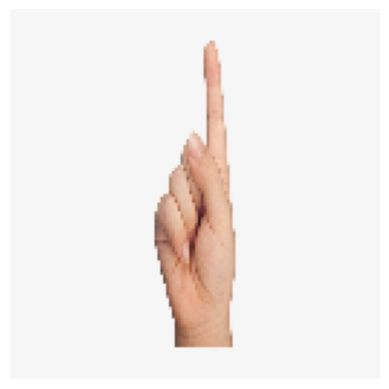

1/1 [==============================] - 4s 4s/step
The finger is 0 from Left Hand



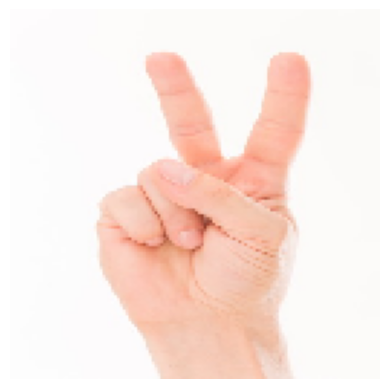

1/1 [==============================] - 0s 40ms/step
The finger is 0 from Left Hand



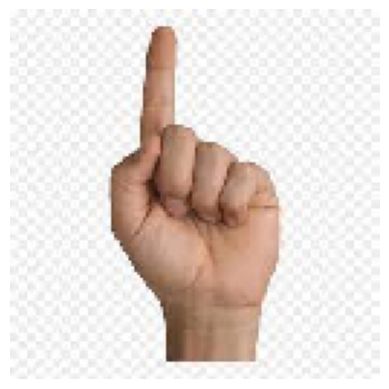

1/1 [==============================] - 0s 40ms/step
The finger is 0 from Left Hand



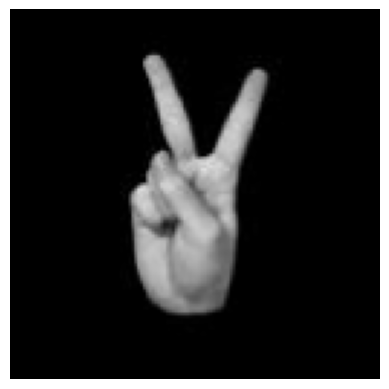

1/1 [==============================] - 0s 48ms/step
The finger is 2 from Right Hand



In [4]:
results = {'0L':'0 from Left Hand',
               '1L':'1 from Left Hand',
               '2L':'2 from Left Hand',
               '3L':'3 from Left Hand',
               '4L':'4 from Left Hand',
               '5L':'5 from Left Hand',
               '0R':'0 from Right Hand',
               '1R':'1 from Right Hand',
               '2R':'2 from Right Hand',
               '3R':'3 from Right Hand',
               '4R':'4 from Right Hand',
               '5R':'5 from Right Hand'}

# Test Images

img_paths = ['img-test-1.png',
             'img-test-2.png',
             'img-test-3.png',
             'img-test-4.png']

for filename in img_paths:
  img = image.load_img(filename, target_size=(128, 128))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  prediction = model_cnn.predict(img_batch)
  result_max_proba = np.argmax(prediction,axis=-1)[0]
  result_class = label_encoder.classes_[result_max_proba]

  print('The finger is', results[result_class])
  print('')

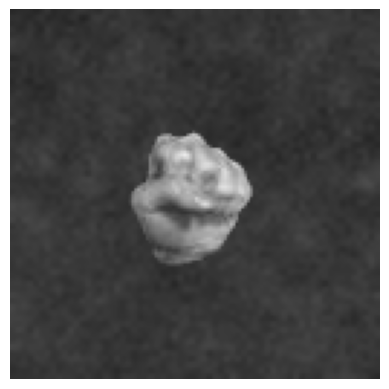

1/1 [==============================] - 0s 32ms/step
The finger is 0 from Left Hand



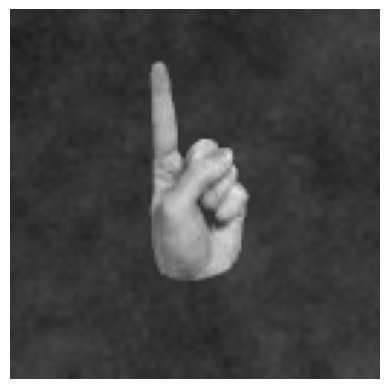

1/1 [==============================] - 0s 32ms/step
The finger is 1 from Left Hand



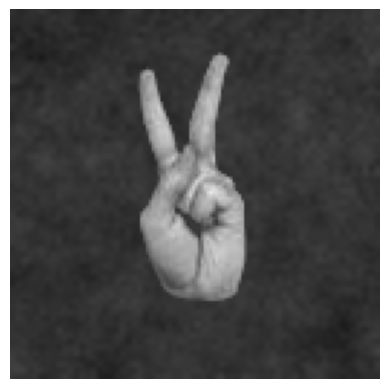

1/1 [==============================] - 0s 32ms/step
The finger is 2 from Left Hand



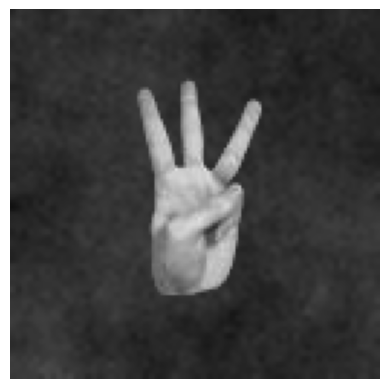

1/1 [==============================] - 0s 24ms/step
The finger is 3 from Left Hand



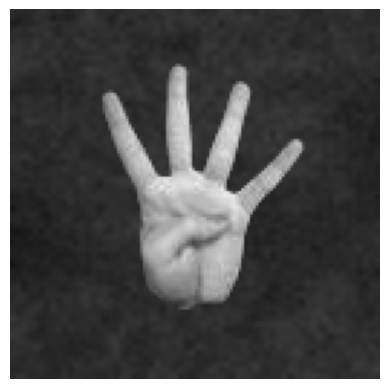

1/1 [==============================] - 0s 40ms/step
The finger is 4 from Left Hand



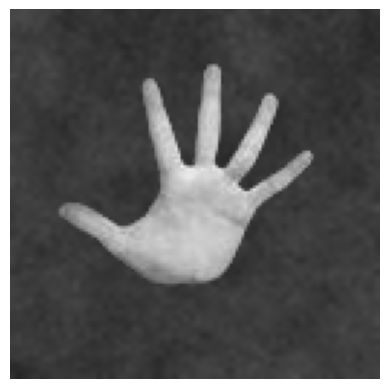

1/1 [==============================] - 0s 40ms/step
The finger is 5 from Left Hand



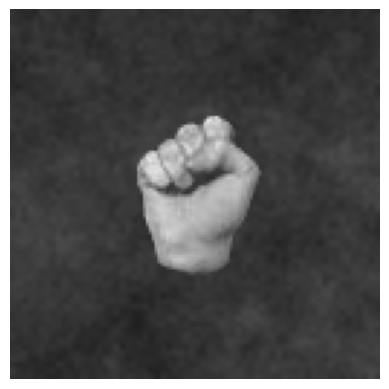

1/1 [==============================] - 0s 48ms/step
The finger is 0 from Right Hand



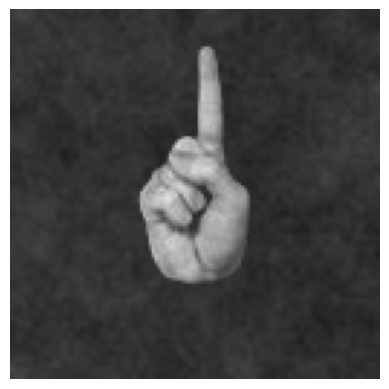

1/1 [==============================] - 0s 32ms/step
The finger is 1 from Right Hand



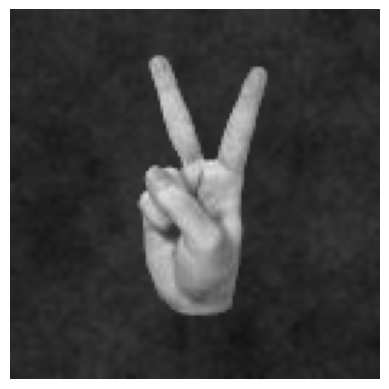

1/1 [==============================] - 0s 32ms/step
The finger is 2 from Right Hand



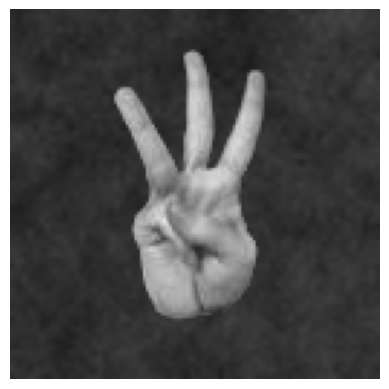

1/1 [==============================] - 0s 41ms/step
The finger is 3 from Right Hand



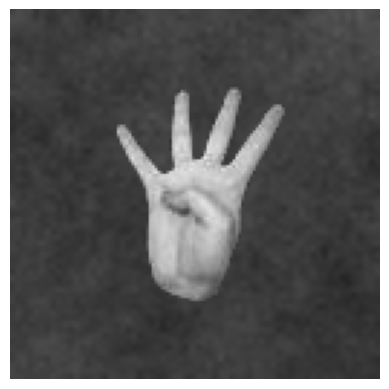

1/1 [==============================] - 0s 32ms/step
The finger is 4 from Right Hand



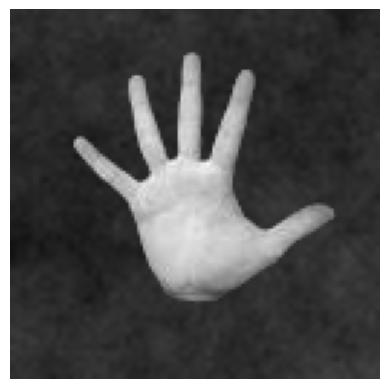

1/1 [==============================] - 0s 40ms/step
The finger is 5 from Right Hand



In [5]:
results = {'0L':'0 from Left Hand',
               '1L':'1 from Left Hand',
               '2L':'2 from Left Hand',
               '3L':'3 from Left Hand',
               '4L':'4 from Left Hand',
               '5L':'5 from Left Hand',
               '0R':'0 from Right Hand',
               '1R':'1 from Right Hand',
               '2R':'2 from Right Hand',
               '3R':'3 from Right Hand',
               '4R':'4 from Right Hand',
               '5R':'5 from Right Hand'}

# Test Images

img_paths = []

for i in results:
  for j in range(len(os.listdir('fingers\\test'))):
    if os.listdir('fingers\\test')[j][-6:-4] == i:
      img_paths.append(os.path.join('fingers\\test',os.listdir('fingers\\test')[j]))
      break

for filename in img_paths:
  img = image.load_img(filename, target_size=(128, 128))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  prediction = model_cnn.predict(img_batch)
  result_max_proba = np.argmax(prediction,axis=-1)[0]
  result_class = label_encoder.classes_[result_max_proba]

  print('The finger is', results[result_class])
  print('')

Dari hasil inference, model belum dapat mendeteksi data yang diluar data train ataupun test. Namun mampu mendeteksi data dari dataset sebelumnya